In [1]:
#This makes the notebook R-ready
library(IRdisplay)
library(IRkernel)

In [2]:
#R libraries
library(ggplot2)
require(reshape2)
require(gtable)
require(grid)
require(scales)

Loading required package: reshape2
Loading required package: gtable
Loading required package: grid
Loading required package: scales


In [3]:
setwd("/global/cscratch1/sd/marielp")
Varnames=c("CMCC-CESM","CMCC-CM","CanESM2","CNRM-CM5","GFDL-CM3","GFDL-ESM2M","HadCM3","HadGEM2-CC","IPSL-CM5A","MIROC-ESM","MIROC5","MPI-ESM-MR","MRI-CGCM3","MRI-ESM1","NorESM1-M")
#Varnames=c("CMCC-CESM","CanESM2","CNRM-CM5","GFDL-CM3","GFDL-ESM2M","HadCM3","HadGEM2-CC","IPSL-CM5A","MIROC-ESM","MIROC5","MPI-ESM-MR","MRI-CGCM3","MRI-ESM1","NorESM1-M")

nvars<-length(Varnames)

summ_all=NULL
summ_merge=NULL
#Load in all of the CSVs
for (d in Varnames){
  ds=read.csv(sprintf("%s/STATS_SUMM/%s_MAM_NH_summtable.csv",d,d))
  dm=read.csv(sprintf("%s/STATS_SUMM/%s_MAM_NH_indicestable.csv",d,d))
  summ_all=rbind(summ_all,ds)
  summ_merge=rbind(summ_merge,dm)
}

Using var, merged as id variables
Using var, merged as id variables
Using var, merged as id variables


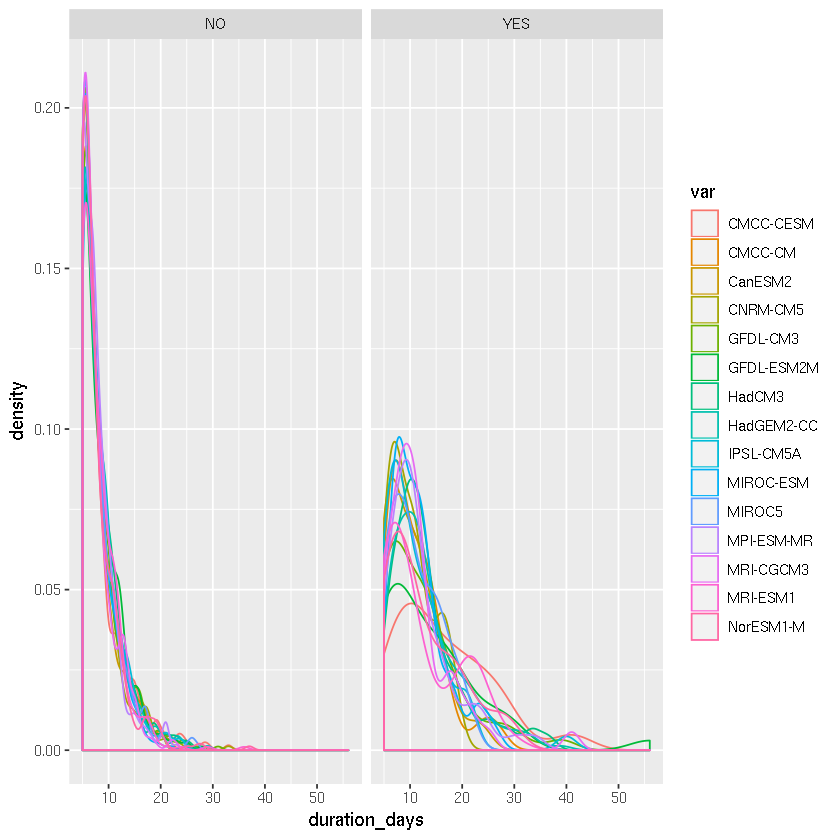

Using var, merged as id variables


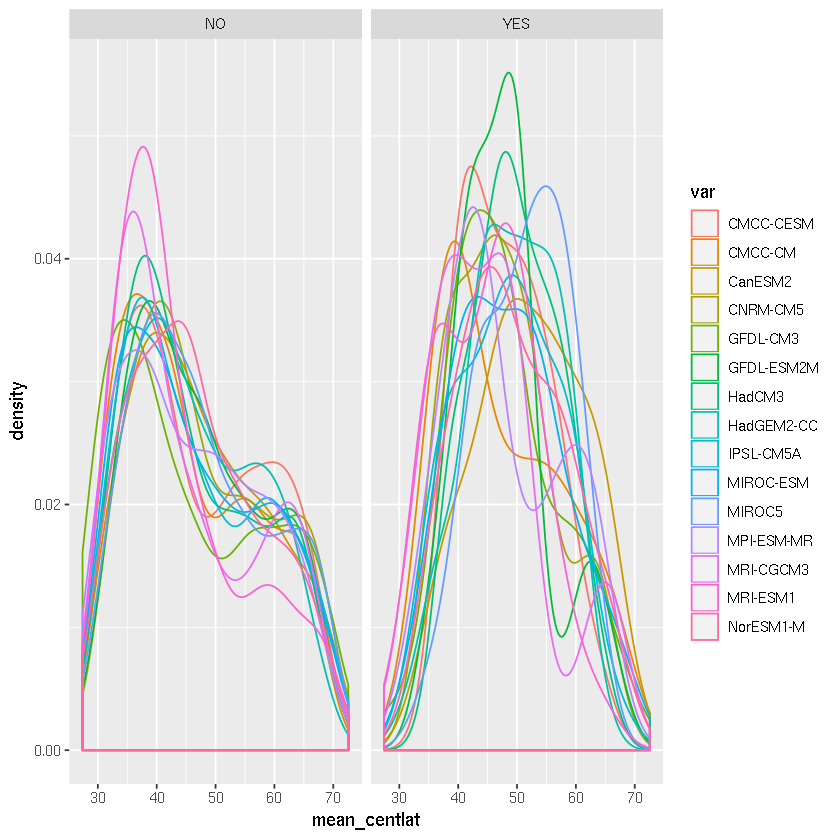

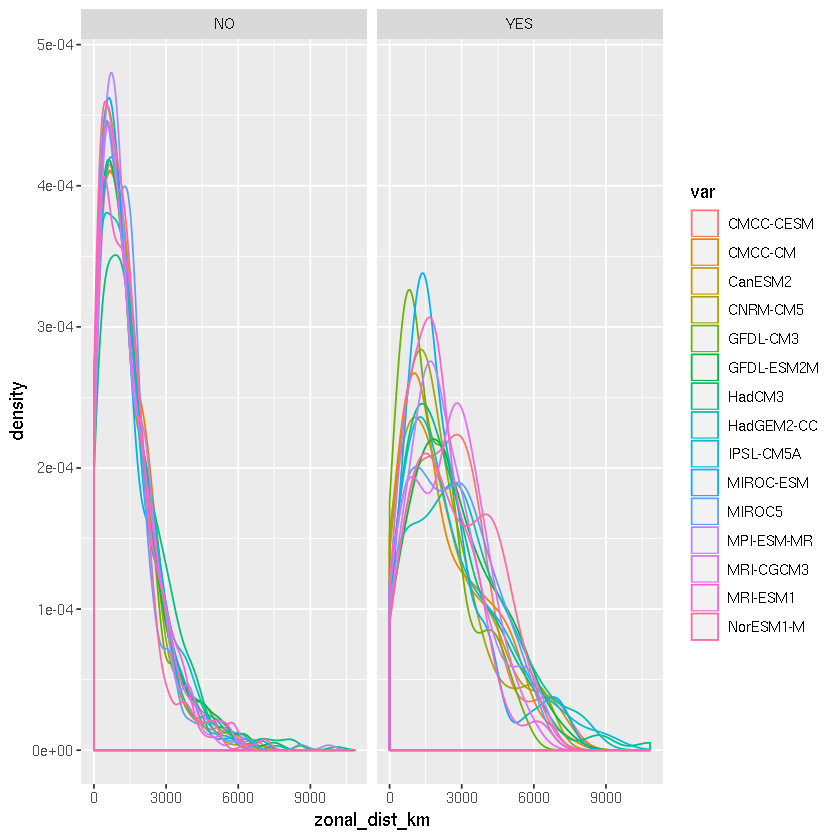

Using var, merged as id variables
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

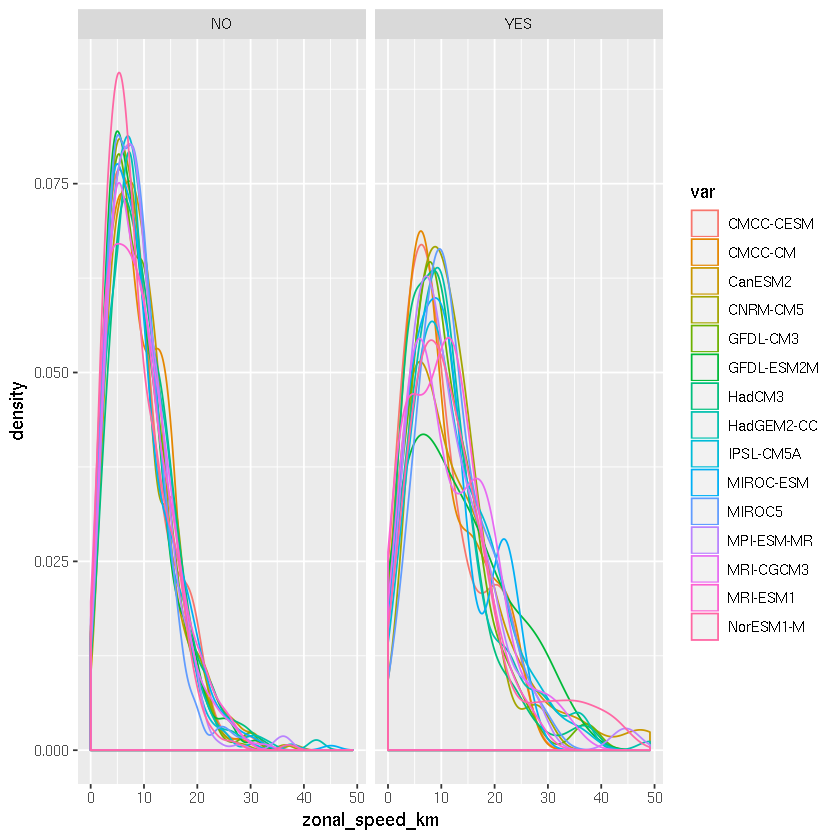

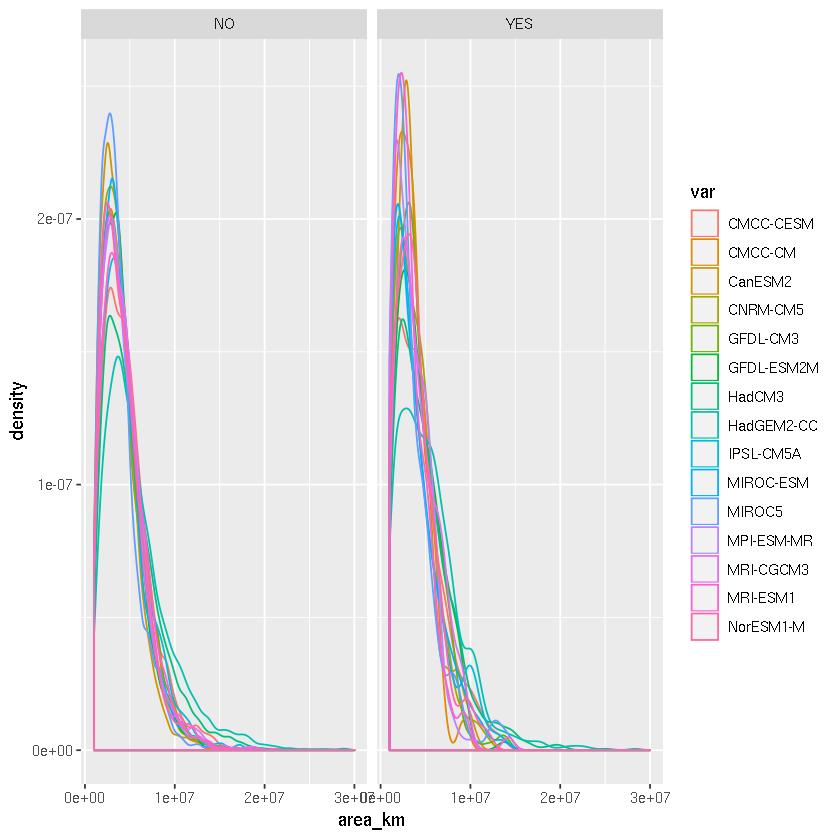

In [4]:
#Plot histograms of values
vars_analyze=c("duration_days","mean_centlat","zonal_dist_km","zonal_speed_km")
for (v in vars_analyze){
  dsub=summ_all[,c("var","merged",v)]
  dmelt=melt(dsub)
  
  g=ggplot(data=dmelt,aes(x=value,color=var))+
    facet_grid(~merged)+
    geom_density() +
    xlab(v)
  print(g)
}
dsub=summ_merge[,c("var","merged","area_km")]
dmelt=melt(dsub)
  g=ggplot(data=dmelt,aes(x=value,color=var))+
    facet_grid(~merged)+
    geom_density() +
    xlab("area_km")+
    xlim(10^6,(30*10^6))
  print(g)


In [17]:
colnames(summ_merge)

[1] "AI"       "BI"       "amax"     "area"     "area_km"  "bnum"    
 [7] "bnum2"    "calendar" "centlat"  "centlon"  "day"      "fname"   
[13] "maxlat"   "maxlon"   "merged"   "minlat"   "minlon"   "month"   
[19] "region"   "season"   "sec"      "sum_area" "time"     "var"     
[25] "year"

In [ ]:
#Do an initial PCA analysis just for the hell of it
#But first we need to code the data
